# Getting started with TensorFlow

#### Learning objectives

1. Practice defining and performing basic operations on contant Tensors
2. Use Rebsorflow's automatic differentiation capability
3. learn how to train linear regression from scratch with TensorFlow

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import tensorflow as tf

In [2]:
print(tf.__version__)

2.12.0


## Operations on Tensors

#### Variables and constants

Tensors in TensorFlow are either constant (tf.constant) or variable (tf.Variable).
Constant values cannot be changed, while variable values can.

To change variable values use:
- x.assign(new_value)
- x.assign_add(value_to_be_added)
- x.assign_sub(value_to_be_subtracted)

In [5]:
x = tf.constant([2,3,4])
x

<tf.Tensor: shape=(3,), dtype=int32, numpy=array([2, 3, 4])>

In [6]:
x = tf.Variable(2.0, dtype=tf.float32, name='my_variable')
x

<tf.Variable 'my_variable:0' shape=() dtype=float32, numpy=2.0>

In [7]:
x.assign(45.8)
x

<tf.Variable 'my_variable:0' shape=() dtype=float32, numpy=45.8>

In [8]:
x.assign_add(4)
x

<tf.Variable 'my_variable:0' shape=() dtype=float32, numpy=49.8>

In [9]:
x.assign_sub(3)
x

<tf.Variable 'my_variable:0' shape=() dtype=float32, numpy=46.8>

## Point-wise Operations

Point-wise tensor operations:
- tf.add
- tf.multiply
- tf.subtract
- tf.math.*

In [10]:
a = tf.constant([5,3,8])
b = tf.constant([3,-1,2])
c = tf.add(a,b)
d = a + b

print("c:", c)
print("d:", d)

c: tf.Tensor([ 8  2 10], shape=(3,), dtype=int32)
d: tf.Tensor([ 8  2 10], shape=(3,), dtype=int32)


In [11]:
a = tf.constant([5,3,8])
b = tf.constant([3,-1,2])
c = tf.multiply(a,b)
d = a * b

print("c:", c)
print("d:", d)

c: tf.Tensor([15 -3 16], shape=(3,), dtype=int32)
d: tf.Tensor([15 -3 16], shape=(3,), dtype=int32)


In [14]:
a = tf.constant([5,3,8], dtype=tf.float32)
b = tf.math.exp(a)

print("b:", b)

b: tf.Tensor([ 148.41316    20.085537 2980.958   ], shape=(3,), dtype=float32)


## NumPy Interoperability

In [16]:
a_py = [1,2]
b_py = [3,4]

In [17]:
tf.add(a_py, b_py)

<tf.Tensor: shape=(2,), dtype=int32, numpy=array([4, 6])>

In [19]:
a_np = np.array([1,2])
b_np = np.array([3,4])

In [20]:
tf.add(a_np, b_np)

<tf.Tensor: shape=(2,), dtype=int32, numpy=array([4, 6])>

In [21]:
a_tf = tf.constant([1,2])
b_tf = tf.constant([3,4])

In [22]:
tf.add(a_tf, b_tf)

<tf.Tensor: shape=(2,), dtype=int32, numpy=array([4, 6])>

In [23]:
a_tf.numpy()

array([1, 2])

## Linear Regression

We'll model de following function:
$$ y = 2x+10$$

In [24]:
X = tf.constant(range(10), dtype=tf.float32)
Y = 2 * X + 10

print("X:{}".format(X))
print("Y:{}".format(Y))

X:[0. 1. 2. 3. 4. 5. 6. 7. 8. 9.]
Y:[10. 12. 14. 16. 18. 20. 22. 24. 26. 28.]


In [40]:
X_test = tf.constant(range(10, 20), dtype=tf.float32)
Y_test = 2 * X_test + 10

print("X_test:{}".format(X_test))
print("Y_test:{}".format(Y_test))

X_test:[10. 11. 12. 13. 14. 15. 16. 17. 18. 19.]
Y_test:[30. 32. 34. 36. 38. 40. 42. 44. 46. 48.]


## Loss Function

Mean Squared Error:

$$ MSE = \frac{1}{m} \sum_{i=1}^{m} (\hat{Y_i}-Y_i)^2$$

In [41]:
y_mean = Y.numpy().mean()

def predict_mean(X):
    y_hat = [y_mean]*len(X)
    return y_hat

Y_hat = predict_mean(X_test)

In [42]:
errors = (Y_hat - Y)**2
loss = tf.reduce_mean(errors)
loss.numpy()

33.0

Linear reggression model:
$$ \hat(Y) = \omega_0 X +\omega_1$$

In [28]:
def loss_mse(X, Y, w0, w1):
    Y_hat = w0*X + w1
    errors = (Y_hat - Y)**2
    return tf.reduce_mean(errors)

## Gradient Fucntion

To use the gradient descent we need to take the partial derivatives fo the loss function with respoect to the weigths.
TensorFlow has automatic differential capabilities.

tf.GradientTape()

In [33]:
def compute_gradient(X, Y, w0, w1):
    with tf.GradientTape() as tape:
        loss = loss_mse(X,Y,w0,w1)
    return tape.gradient(loss, [w0,w1])

In [34]:
w0 = tf.Variable(0.0)
w1 = tf.Variable(0.0)

dw0, dw1 = compute_gradient(X, Y, w0, w1)

In [36]:
print("dw0:", dw0.numpy())

dw0: -204.0


In [37]:
print("dw1:", dw1.numpy())

dw1: -38.0


## Training Looop

In [38]:
STEPS = 1000
LEARNING_RATE = 0.02
MSG = "STEP {step} - loss: {loss}, w0: {w0}, w1: {w1}\n"

w0 = tf.Variable(0.0)
w1 = tf.Variable(0.0)

for step in range(0, STEPS+1):

    dw0, dw1 = compute_gradient(X, Y, w0, w1)
    w0.assign_sub(dw0*LEARNING_RATE)
    w1.assign_sub(dw1*LEARNING_RATE)

    if step %100 == 0:
        loss = loss_mse(X, Y, w0, w1)
        print(MSG.format(step=step, loss=loss, w0=w0.numpy(), w1=w1.numpy()))


STEP 0 - loss: 35.70719528198242, w0: 4.079999923706055, w1: 0.7599999904632568

STEP 100 - loss: 2.6017532348632812, w0: 2.4780430793762207, w1: 7.002389907836914

STEP 200 - loss: 0.26831889152526855, w0: 2.153517961502075, w1: 9.037351608276367

STEP 300 - loss: 0.027671903371810913, w0: 2.0493006706237793, w1: 9.690855979919434

STEP 400 - loss: 0.0028539239428937435, w0: 2.0158326625823975, w1: 9.90071964263916

STEP 500 - loss: 0.0002943490108009428, w0: 2.005084753036499, w1: 9.96811580657959

STEP 600 - loss: 3.0356444767676294e-05, w0: 2.0016329288482666, w1: 9.989760398864746

STEP 700 - loss: 3.1322738323069643e-06, w0: 2.0005245208740234, w1: 9.996710777282715

STEP 800 - loss: 3.2238213520940917e-07, w0: 2.0001683235168457, w1: 9.998944282531738

STEP 900 - loss: 3.369950718479231e-08, w0: 2.000054359436035, w1: 9.999658584594727

STEP 1000 - loss: 3.6101481803996194e-09, w0: 2.0000178813934326, w1: 9.99988842010498



In [43]:
loss = loss_mse(X_test, Y_test, w0, w1)
loss.numpy()

2.4563633e-08

try modeling a non-linear function such as $ y = x e^{-x^2}$

In [44]:
X = tf.constant(np.linspace(0,2,1000), dtype=tf.float32)
Y = X * tf.exp(-X**2)

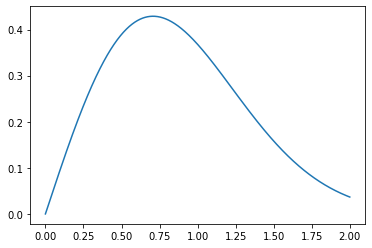

In [45]:
%matplotlib inline

plt.plot(X,Y)

In [66]:
def make_features(X):
    f1 = tf.ones_like(X)
    f2 = X
    f3 = tf.square(X)
    f4 = tf.sqrt(X)
    f5 = tf.exp(X)
    return tf.stack([f1,f2,f3,f4,f5])

In [91]:
def predict(X, W):
    return tf.squeeze(tf.transpose(X) @ W ,-1)

In [92]:
def loss_mse(X, Y, W):
    Y_hat = predict(X, W)
    errors = (Y_hat - Y)**2
    return tf.reduce_mean(errors)

In [93]:
def compute_gradient(X, Y, W):
    with tf.GradientTape() as tape:
        loss = loss_mse(X, Y, W)
    return tape.gradient(loss, W)

STEP: 2000 MSE 0.0023767943494021893


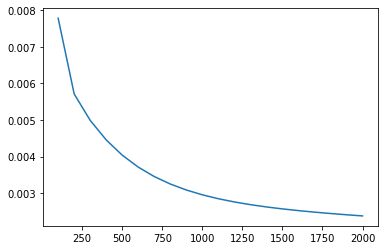

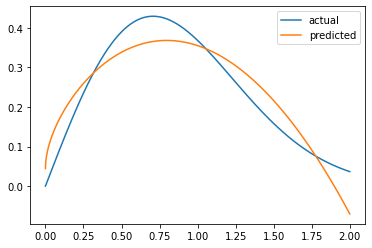

In [95]:
STEPS = 2000
LEARNING_RATE = 0.02

Xf = make_features(X)
n_weights = Xf.shape[0]

W = tf.Variable(np.zeros((n_weights, 1)), dtype=tf.float32)
#print(Xf.shape)
#print(W.shape)

steps, losses = [], []
plt.figure()

for step in range(1, STEPS+1):

    dW = compute_gradient(Xf, Y, W)
    W.assign_sub(dW * LEARNING_RATE)

    if step % 100 == 0:
        loss = loss_mse(Xf, Y, W)
        steps.append(step)
        losses.append(loss)
        plt.clf()
        plt.plot(steps, losses)

print("STEP: {} MSE {}".format(STEPS, loss_mse(Xf,Y,W)))
plt.figure()
plt.plot(X, Y, label = 'actual')
plt.plot(X, predict(Xf, W), label = 'predicted')
plt.legend()

In [88]:
tf.squeeze(tf.transpose(Xf) @ W ,-1)

<tf.Tensor: shape=(1000,), dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 

In [81]:
Xf

<tf.Tensor: shape=(5, 1000), dtype=float32, numpy=
array([[1.0000000e+00, 1.0000000e+00, 1.0000000e+00, ..., 1.0000000e+00,
        1.0000000e+00, 1.0000000e+00],
       [0.0000000e+00, 2.0020020e-03, 4.0040039e-03, ..., 1.9959960e+00,
        1.9979980e+00, 2.0000000e+00],
       [0.0000000e+00, 4.0080117e-06, 1.6032047e-05, ..., 3.9840000e+00,
        3.9919960e+00, 4.0000000e+00],
       [0.0000000e+00, 4.4743735e-02, 6.3277200e-02, ..., 1.4127972e+00,
        1.4135056e+00, 1.4142135e+00],
       [1.0000000e+00, 1.0020040e+00, 1.0040120e+00, ..., 7.3595295e+00,
        7.3742781e+00, 7.3890562e+00]], dtype=float32)>

In [82]:
W

<tf.Variable 'Variable:0' shape=(5, 1) dtype=float32, numpy=
array([[0.],
       [0.],
       [0.],
       [0.],
       [0.]], dtype=float32)>